In [15]:
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
import scipy.stats       as stats
import statsmodels.api   as sm

In [2]:
# 엑셀 데이터 읽어오기
school = pd.read_excel(io         = "./School.xlsx",
                       sheet_name = 0,
                       header     = 0)
school.head()

시도 고등학교유형  설립  학급수   학생수  정규교원수  비정규교원수  시간강사
0  서울    일반고  국립   27   973     57       9     2
1  서울    일반고  공립   38  1194     78       6     3
2  서울    일반고  공립   34  1205     70       8     0
3  서울    일반고  공립   46  1737     90       5     9
4  서울    자율고  공립   33   851     64       3     3

In [3]:
# 고등학교유형별 정규교원수의 현황
school.groupby("고등학교유형")["정규교원수"].mean()

고등학교유형
일반고      51.097368
자율고      56.689024
특성화고     46.290581
특수목적고    43.125874
Name: 정규교원수, dtype: float64

<Axes: xlabel='고등학교유형', ylabel='정규교원수'>

C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 48152 (\N{HANGUL SYLLABLE BAN}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing f

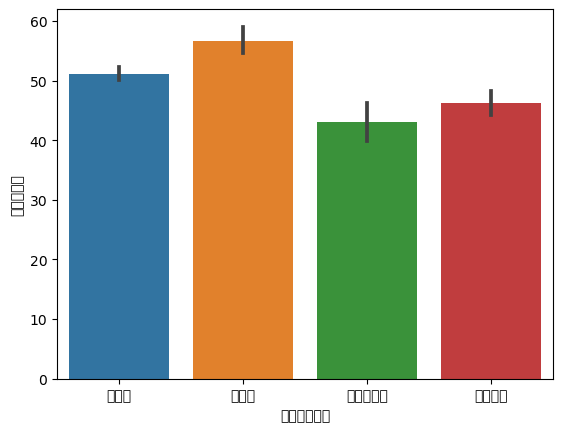

In [4]:
sns.barplot(data = school,
            y    = "정규교원수",
            x    = "고등학교유형")

In [8]:
# 분산분석(ANOVA)
stats.f_oneway(school.loc[school["고등학교유형"] == "일반고"     , "정규교원수"],
               school.loc[school["고등학교유형"] == "특성화고"   , "정규교원수"],
               school.loc[school["고등학교유형"] == "자율고"     , "정규교원수"],
               school.loc[school["고등학교유형"] == "특수목적고" , "정규교원수"])

F_onewayResult(statistic=17.14602602218377, pvalue=5.169532378847636e-11)

In [7]:
# p-value(유의확률) = 0.000 < 유의수준(0.05) : 대립가설
# 고등학교유형에 따라 정규교원수에 통계적으로 유의한 차이가 있다.

고등학교유형
일반고      1520
특성화고      499
자율고       164
특수목적고     143
Name: count, dtype: int64

In [9]:
# 상관분석(Correlation Analysis) : 상관관계 = 직선의 관계 = 선형의 관계
# Y : 정규교원수
# X : 학생수

<Axes: xlabel='학생수', ylabel='정규교원수'>

C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44508 (\N{HANGUL SYLLABLE GYU}) missing from current font.
  func(*args, **kwargs)
C:\Users\buillee\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) miss

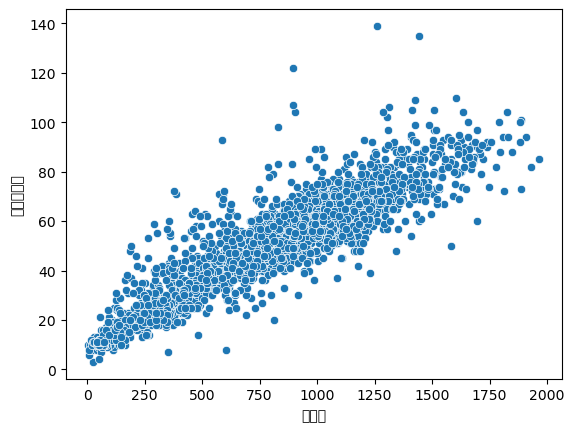

In [10]:
# (1) 산점도(Scatter Plot)
sns.scatterplot(x = school["학생수"], y = school["정규교원수"])

In [11]:
# 상관분석
# 귀무가설 : 학생수와 정규교원수 간에는 상관관계가 없다.
# 대립가설 : 학생수와 정규교원수 간에는 상관관계가 있다.

# Pearson, Spearman, Kendall
stats.pearsonr(x = school["학생수"], y = school["정규교원수"])

PearsonRResult(statistic=0.9039742910531682, pvalue=0.0)

In [12]:
# statistic=0.9039742910531682 : 상관계수(Coefficient of Correlation)
# p-value(0.000) < 유의수준(0.05) : 대립가설
# 학생수와 정규교원수 간에는 통계적으로 의미있는 양의 상관관계가 있는 것으로 나타났다.

In [20]:
# 회귀분석(Regression Analysis) : 인과관계 = 원인과 결과의 관계
# Y : 정규교원수
# X : 학급수, 학생수, 비정규교원수, 시간강사

X = school.loc[: , ["학급수", "학생수", "비정규교원수"]]
Y = school["정규교원수"]

In [21]:
results = sm.OLS(endog = Y, exog = X).fit()

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  정규교원수   R-squared (uncentered):                   0.990
Model:                            OLS   Adj. R-squared (uncentered):              0.990
Method:                 Least Squares   F-statistic:                          7.800e+04
Date:                Mon, 29 Apr 2024   Prob (F-statistic):                        0.00
Time:                        21:46:40   Log-Likelihood:                         -7216.2
No. Observations:                2326   AIC:                                  1.444e+04
Df Residuals:                    2323   BIC:                                  1.446e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
학급수            2.4453      0.028     86.738      0.000       2.390       2.501
학생수           -0.0100      0.001    -11.630      0.000      -0.012      -0.008
비정규교원수        -0.6638      0.024    -27.495      0.000      -0.711      -0.616
==============================================================================
Omnibus:                      459.414   Durbin-Watson:                   1.436
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11042.020
Skew:                          -0.273   Prob(JB):                         0.00
Kurtosis:                      13.660   Cond. No.                         238.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""